# 人工神经网络ANN

In [14]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 感知器： Perceptrons
感知器是人工神经ANN最简单的架构。它基于线性阈值单元（LTU):输入和输出都是数值，每个输入有相应的权重weight。 LTU计算其权重的和($z=w_1x_1 + w_2x_2 + ... + w_nx_n = W^T\cdot X$,之后将sum输入到一个阶跃函数，输出结果：$h_w(X) = step(z) = step(W^T\cdot X)$ 。  
感知器最常用的阶跃函数是Heaciside阶跃函数，有时也会用sign函数。  
$heaviside(z) = \left\{\begin{matrix}
0 & if & z <  0 \\ 
 1& if &z \geq  0 
\end{matrix}\right.$  
  
$
sign(z) = \left\{\begin{matrix}
-1 & if & z <  0 \\ 
 0& if &z =   0  \\
 +1& if &z \geq  0 
\end{matrix}\right.$  
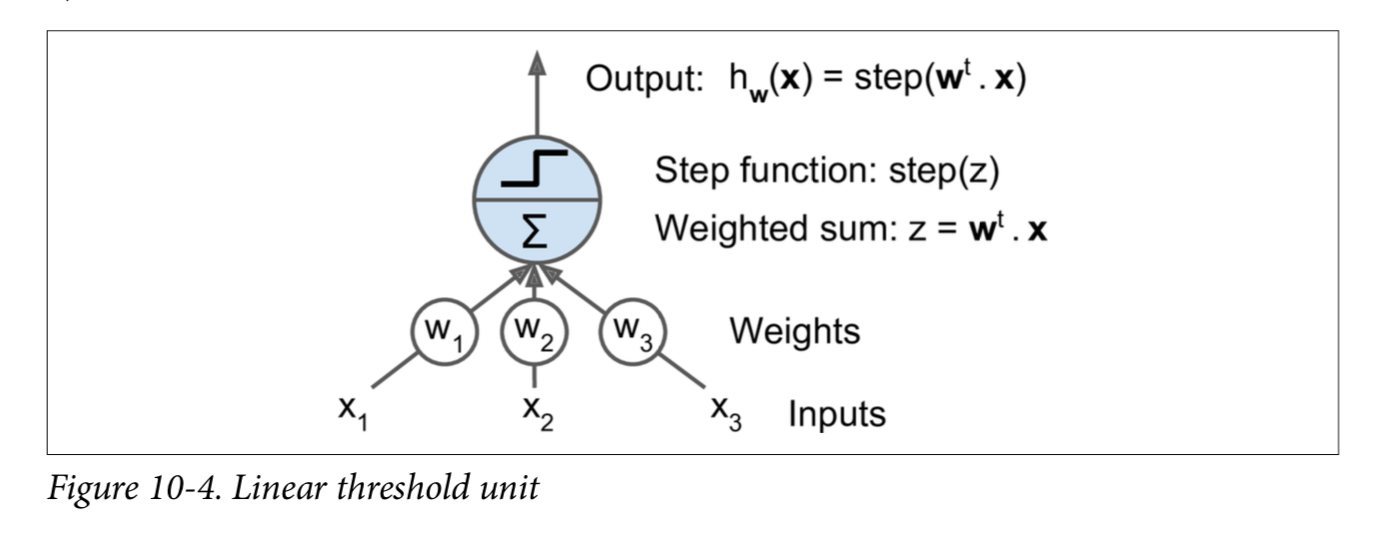

一个LTU可以用于简单的线性分类。其计算输入的线性组合，如果结果超过阈值，则为正类，否则为负类。
就像逻辑回归和线性svm分类器。  
一个感知器有一层LTU组成，每一个都与所有的输入特征相连。  
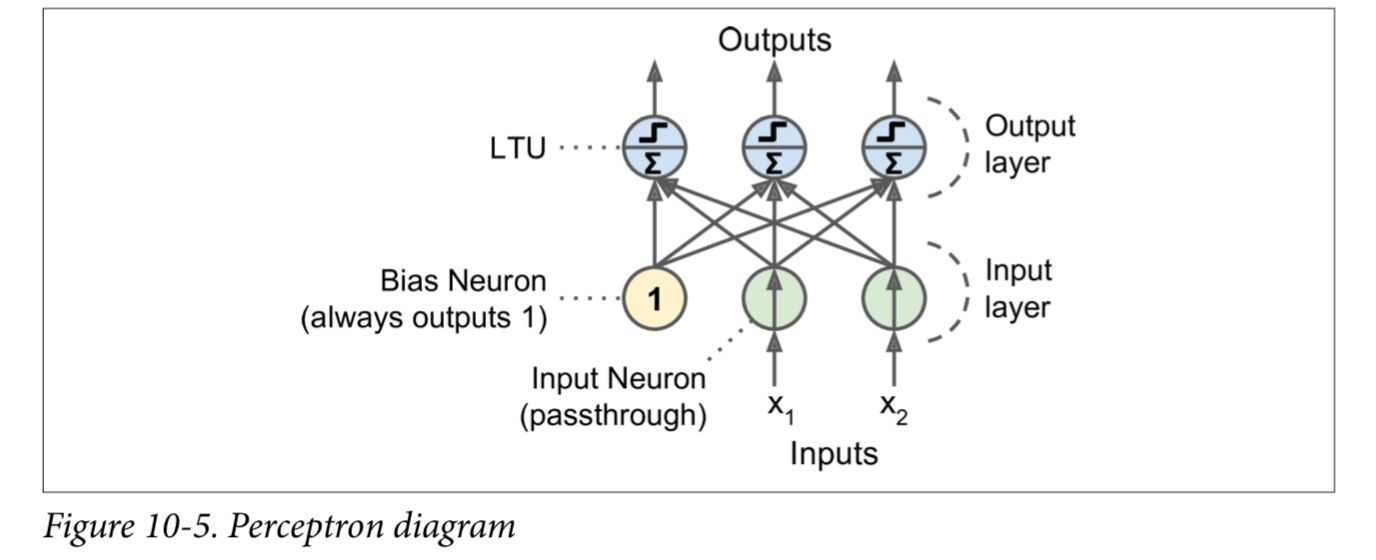  
这些连接通常用特殊的通路(输入神经元)来表示, 输出完全由输入决定。此外，可以看到，添加了额外的偏置项(x0=1这个偏置项用一种特殊类型的神经元来表示，被称为"偏置神经元"。  
上述感知器有两个输入和3个输出， 这个感知器可以将实例同时划分为三个不同的二进制类，这使得它成为一个多输出分类器。  
那么怎么进行训练呢？当两个神经元有相同的输出时，其连接的权重会增加，反之会减少。
感知器使用这个规则的一个变种来训练，考虑到网络的错误，当某个神经元输出错误时不会加强连接。更特殊的是，感知器每次训练一个实例，每个实例做一次预测。对于每个产生错误预测输出的输出神经元， 它加强了输入的连接权重，这将有助于正确的预测。

---
###### 感知器权重更新：
$w_{i, j}^{next step} = w_{i, j} + \eta (\hat y_{j} - y_j)x_i$  
如上公式：  
$w_{i, j}$ 表示$i^{th}$输入神经元和$j^{th}$输出神经元的连接权重  
$x_i$是$i^{th}$当前训练实例的输入值  
$\hat y_{j}$是$j_i$当前训练实例的输出神经元  
$y_{j}$是$j_i$当前训练实例输出神经元的目标输出  
$\eta$ 是学习率

----
每个输出神经元的决策边界都是线性的，因此感知器无法学习复杂的模型，比附逻辑回归分类。
然而，如果训练集是线性可分的，感知器收敛定律可以得到一个收敛的解决方案。

sklearn中提供了感知器，实现简单的LTU网络。可以再iris数据集上使用。

In [6]:
import  numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  #花瓣长度和宽度
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [7]:
y_pred

array([1])

注意，与逻辑回归分类器相反，感知器并不输预测值的可能性， 只是根据一个硬性阈值去做预测。因此更喜欢使用逻辑回归而不是感知器。  
感知器不能解决简单的问题，比如进行or或者xor运算。 但是可以通过叠加多个感知器来解决。由此产生的ANN也称为MLP(多层感知器)。  
多层感知器可以解决XOR问题， 如下图，根据不同的权重，输入(0, 0), (1, 1) 则输出0， (0 ,1), (1, 0)则输出1. 
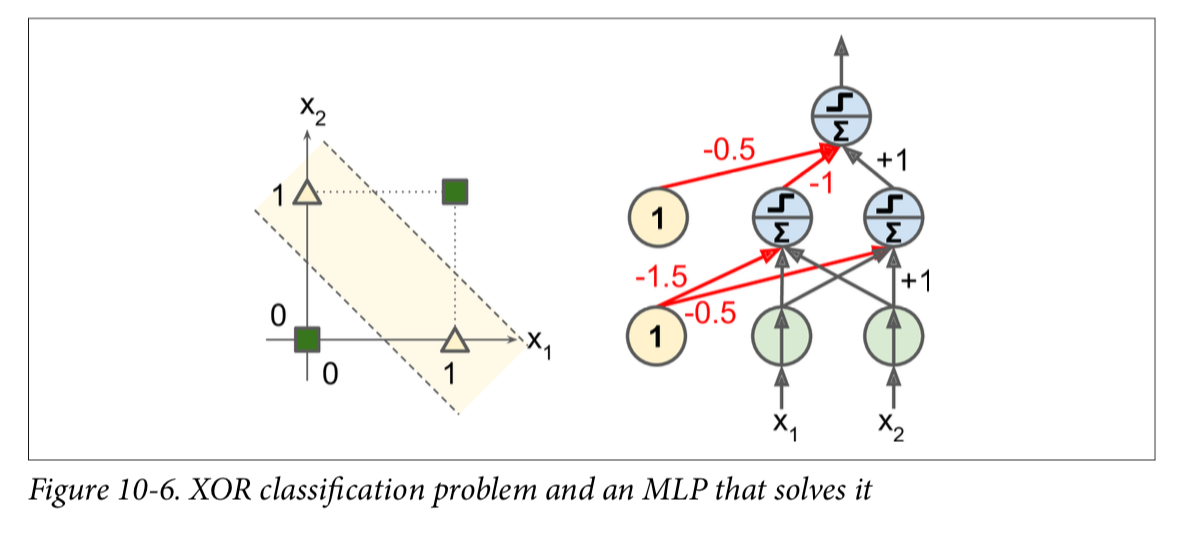

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Saving figure perceptron_iris_plot


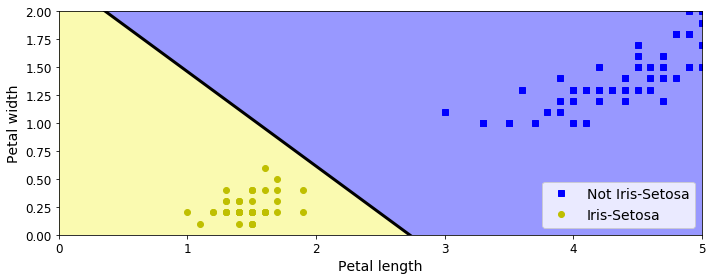

In [22]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1) ,
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1) ,
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [[a * axes[0] + b], a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# 多层感知机和反向传播算法

多层感知机由输入层，一个或多个LTUs(隐藏层), 和一个LTU输出层组成。除输出层外每一层都添加一个偏置项，与下一层的所有神经元相连。当ANN都多个隐藏层时，称为DNN(深度神经网络)。
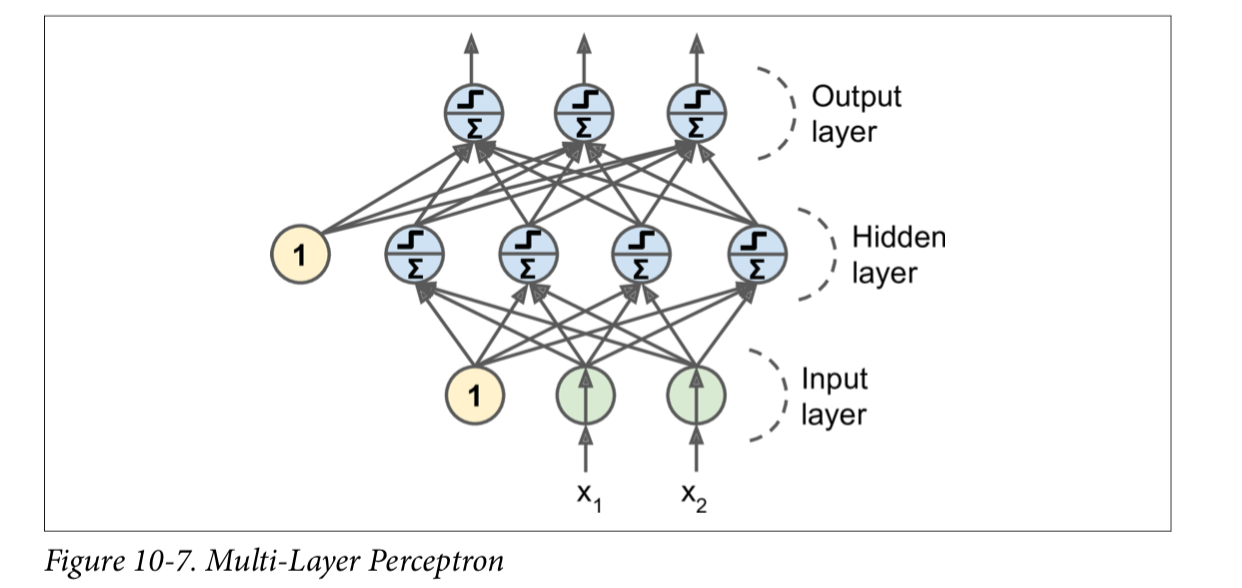

使用反向传播算法对MLP进行训练。 目前把它描述为梯度下降，使用反模式进行自动微分计算(reverse-mode autodiff)。    
对于每一个实例， 输入到网络中，并在每个连续层中计算每个神经元的输出(前向传播)。之后测量神经网络输出误差(实际值和预测值之间的误差)， 并计算最后一个隐藏层中每个神经元对每个输出神经元误差的贡献值。继续测量这些误差分别来自其前一个隐藏层中的神经元， 直到输入层。通过在网络中反向传播错误梯度(因此该算法的名称)，这种反向传递有效地测量了网络中所有连接权重的误差梯度。  
简短来说， 对于每个训练实例，反向传播算法首先进行正向预测， 测量与实际值的误差， 然后依次遍历每个层，以测量每个连接的错误贡献(反向传递)。最后调整连接权重以减小误差(梯度下降步骤)  


# 激活函数
反向传播算法常用的激活函数是双曲正切函数tanh (z) = 2 (2z) - 1 和ReLU。  
函数图像如下所示。  

In [23]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):  #导数
    return (f(z + eps) - f(z)) / (2 * eps)

Saving figure activation_functions_plot


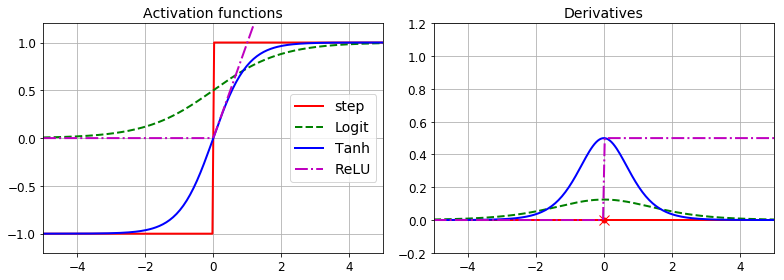

In [26]:
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=2, label="step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

#倒数的函数图像
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [37]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

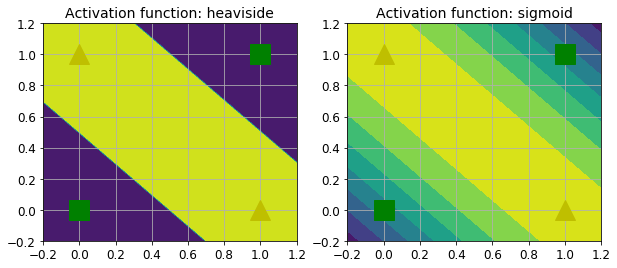

In [39]:
z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST(前馈神经网络)

使用tensorflow高级APi训练MLP

In [1]:
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets("./tmp/data")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [5]:
import tensorflow as tf
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c2cc7bcc0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpwobp_8o8'}
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an eq

INFO:tensorflow:loss = 0.09158767, step = 6001 (0.236 sec)
INFO:tensorflow:global_step/sec: 456.723
INFO:tensorflow:loss = 0.016994452, step = 6101 (0.219 sec)
INFO:tensorflow:global_step/sec: 496.47
INFO:tensorflow:loss = 0.014144677, step = 6201 (0.201 sec)
INFO:tensorflow:global_step/sec: 508.816
INFO:tensorflow:loss = 0.046989374, step = 6301 (0.197 sec)
INFO:tensorflow:global_step/sec: 482.402
INFO:tensorflow:loss = 0.029835718, step = 6401 (0.207 sec)
INFO:tensorflow:global_step/sec: 477.462
INFO:tensorflow:loss = 0.012120284, step = 6501 (0.209 sec)
INFO:tensorflow:global_step/sec: 510.183
INFO:tensorflow:loss = 0.018457942, step = 6601 (0.196 sec)
INFO:tensorflow:global_step/sec: 494.266
INFO:tensorflow:loss = 0.01866937, step = 6701 (0.202 sec)
INFO:tensorflow:global_step/sec: 477.868
INFO:tensorflow:loss = 0.006992576, step = 6801 (0.210 sec)
INFO:tensorflow:global_step/sec: 462.851
INFO:tensorflow:loss = 0.011876131, step = 6901 (0.216 sec)
INFO:tensorflow:global_step/sec: 4

INFO:tensorflow:global_step/sec: 455.701
INFO:tensorflow:loss = 0.007733152, step = 14101 (0.219 sec)
INFO:tensorflow:global_step/sec: 458.119
INFO:tensorflow:loss = 0.005355404, step = 14201 (0.219 sec)
INFO:tensorflow:global_step/sec: 479.267
INFO:tensorflow:loss = 0.0010458081, step = 14301 (0.208 sec)
INFO:tensorflow:global_step/sec: 503.291
INFO:tensorflow:loss = 0.0010200407, step = 14401 (0.199 sec)
INFO:tensorflow:global_step/sec: 507.248
INFO:tensorflow:loss = 0.0007770887, step = 14501 (0.197 sec)
INFO:tensorflow:global_step/sec: 465.886
INFO:tensorflow:loss = 0.0047327857, step = 14601 (0.215 sec)
INFO:tensorflow:global_step/sec: 502.005
INFO:tensorflow:loss = 0.0013935354, step = 14701 (0.199 sec)
INFO:tensorflow:global_step/sec: 500.011
INFO:tensorflow:loss = 0.0012084801, step = 14801 (0.200 sec)
INFO:tensorflow:global_step/sec: 473.658
INFO:tensorflow:loss = 0.0025510348, step = 14901 (0.211 sec)
INFO:tensorflow:global_step/sec: 502.894
INFO:tensorflow:loss = 0.001657479

INFO:tensorflow:global_step/sec: 503.441
INFO:tensorflow:loss = 0.00021831814, step = 22101 (0.199 sec)
INFO:tensorflow:global_step/sec: 503.349
INFO:tensorflow:loss = 0.0011235884, step = 22201 (0.199 sec)
INFO:tensorflow:global_step/sec: 504.964
INFO:tensorflow:loss = 0.0014319408, step = 22301 (0.198 sec)
INFO:tensorflow:global_step/sec: 503.603
INFO:tensorflow:loss = 0.0017195854, step = 22401 (0.199 sec)
INFO:tensorflow:global_step/sec: 500.095
INFO:tensorflow:loss = 0.0013834655, step = 22501 (0.200 sec)
INFO:tensorflow:global_step/sec: 496.669
INFO:tensorflow:loss = 0.0023542503, step = 22601 (0.201 sec)
INFO:tensorflow:global_step/sec: 484.854
INFO:tensorflow:loss = 0.00080925203, step = 22701 (0.206 sec)
INFO:tensorflow:global_step/sec: 489.541
INFO:tensorflow:loss = 0.00094488857, step = 22801 (0.204 sec)
INFO:tensorflow:global_step/sec: 498.512
INFO:tensorflow:loss = 0.0017224926, step = 22901 (0.200 sec)
INFO:tensorflow:global_step/sec: 504.572
INFO:tensorflow:loss = 0.0005

INFO:tensorflow:global_step/sec: 488.096
INFO:tensorflow:loss = 0.0005753754, step = 30101 (0.205 sec)
INFO:tensorflow:global_step/sec: 501.688
INFO:tensorflow:loss = 0.00020756759, step = 30201 (0.199 sec)
INFO:tensorflow:global_step/sec: 510.158
INFO:tensorflow:loss = 0.0006065329, step = 30301 (0.196 sec)
INFO:tensorflow:global_step/sec: 505.671
INFO:tensorflow:loss = 0.0015114803, step = 30401 (0.198 sec)
INFO:tensorflow:global_step/sec: 504.987
INFO:tensorflow:loss = 0.0007540773, step = 30501 (0.198 sec)
INFO:tensorflow:global_step/sec: 509.751
INFO:tensorflow:loss = 0.0008397877, step = 30601 (0.196 sec)
INFO:tensorflow:global_step/sec: 506.506
INFO:tensorflow:loss = 0.0006652894, step = 30701 (0.197 sec)
INFO:tensorflow:global_step/sec: 510.584
INFO:tensorflow:loss = 0.0011532765, step = 30801 (0.196 sec)
INFO:tensorflow:global_step/sec: 504.396
INFO:tensorflow:loss = 0.0005673089, step = 30901 (0.198 sec)
INFO:tensorflow:global_step/sec: 499.032
INFO:tensorflow:loss = 0.001030

INFO:tensorflow:loss = 0.0002537457, step = 38001 (0.208 sec)
INFO:tensorflow:global_step/sec: 486.469
INFO:tensorflow:loss = 0.00093472557, step = 38101 (0.206 sec)
INFO:tensorflow:global_step/sec: 509.424
INFO:tensorflow:loss = 0.0007520715, step = 38201 (0.196 sec)
INFO:tensorflow:global_step/sec: 506.334
INFO:tensorflow:loss = 5.7870242e-05, step = 38301 (0.197 sec)
INFO:tensorflow:global_step/sec: 494.925
INFO:tensorflow:loss = 0.00014058384, step = 38401 (0.202 sec)
INFO:tensorflow:global_step/sec: 482.529
INFO:tensorflow:loss = 0.00043528437, step = 38501 (0.207 sec)
INFO:tensorflow:global_step/sec: 501.891
INFO:tensorflow:loss = 0.0006792026, step = 38601 (0.199 sec)
INFO:tensorflow:global_step/sec: 454.469
INFO:tensorflow:loss = 0.0004916638, step = 38701 (0.220 sec)
INFO:tensorflow:global_step/sec: 501.973
INFO:tensorflow:loss = 0.000119088356, step = 38801 (0.199 sec)
INFO:tensorflow:global_step/sec: 505.226
INFO:tensorflow:loss = 0.0013112797, step = 38901 (0.198 sec)
INFO:

SKCompat()

In [9]:
from sklearn.metrics import accuracy_score
y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred["classes"])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpwobp_8o8/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9836

In [10]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07124013738807475

# 构建基本神经网络实现



### 构建流程

In [60]:
# 指定神经网络的基本结构
import tensorflow as tf
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [61]:
# 使用placeholder表示输入输出

reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

创建神经网络：X作为输入层；在执行阶段，每次由batch训练集代替，(注意，训练批次中的所有实例都将由神经网络同时处理).  
创建两个隐藏层和一个输出层。两个隐藏层大体相同，不同之处在于它们被连接到的输入和它们所包含的神经元的数量。  
输出层也很相似，但是使用softmax激活函数做一个转换。如下：

In [62]:

def neuron_layer(X, n_neurons, name, actication = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev = stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if actication is not None:
            return actication(Z)
        else:
            return Z

如上函数：
1. 首先创建name_scope， 包含该层神经元所有的计算节点。
2. 根据输入矩阵的shape得到输入实例的个数， 以及输入实例的特征数。
3. 接下来三行，W表示矩阵的权重，是一个2D 张量，包含每个输入实例和每个神经元之间的所有连接权重;
    因此，其shape为(n_inputs, n_neurons)， 值随机初始化(高斯分布初始化)。
    对所有隐藏层随机初始化连接权值是很重要的，避免了梯度下降算法无法打破的任何对称。
4. 创建偏置变量b， 初始化为0。（每个神经元有一个偏置参数）
5. 之后创建子图去计算 z = X * W + b. 这个矢量化的实现将有效地计算输入的加权和， 加上每一个神经元在这一层中的偏置项，因为该batch中的所有实例只执行一次。
6. 最后，如果激活函数为"relu"， 则视情况返回结果。

---

如上定义了一层神经元，下面创建DNN。  
第一个隐藏层以X作为输入，第二个隐藏层以第一个隐藏层的输出作为输入。最后，输出层以第二个隐藏层的输出作为输入。由于优化的原因，最后将输出通过softmax函数。

In [51]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", actication=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", actication=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")
#     hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
#     hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
#     logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [52]:
# 通过sofrmax， 并计算交叉熵来得到误差
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [53]:
# 定义优化器进行优化 
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

###### 最重要的一步是在创建阶段说明如何评估模型。这里简单使用精确度来测量。首先，对于每个实例，通过检查最大可能性来判断是否对应于目标类，确定神经网络的预测是否正确。  

In [54]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

## 执行阶段
这个阶段比较简单， 加载数据，进行缩放，随机打乱，写一个函数获取batch训练集。

In [55]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [56]:
n_epochs = 20
batch_size = 50

In [57]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images, 
                                          y:mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Val accuracy: 0.9016
1 Train accuracy: 0.92 Val accuracy: 0.9252
2 Train accuracy: 0.96 Val accuracy: 0.936
3 Train accuracy: 0.94 Val accuracy: 0.9412
4 Train accuracy: 0.94 Val accuracy: 0.9488
5 Train accuracy: 0.94 Val accuracy: 0.9514
6 Train accuracy: 0.98 Val accuracy: 0.957
7 Train accuracy: 0.94 Val accuracy: 0.96
8 Train accuracy: 1.0 Val accuracy: 0.961
9 Train accuracy: 1.0 Val accuracy: 0.9638
10 Train accuracy: 1.0 Val accuracy: 0.9664
11 Train accuracy: 0.96 Val accuracy: 0.9676
12 Train accuracy: 0.98 Val accuracy: 0.97
13 Train accuracy: 0.96 Val accuracy: 0.969
14 Train accuracy: 0.96 Val accuracy: 0.9708
15 Train accuracy: 1.0 Val accuracy: 0.9728
16 Train accuracy: 0.96 Val accuracy: 0.9726
17 Train accuracy: 0.98 Val accuracy: 0.9742
18 Train accuracy: 0.98 Val accuracy: 0.9736
19 Train accuracy: 0.98 Val accuracy: 0.9746


In [58]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [ ]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

In [ ]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '"'))
    display(HTML(iframe))

In [ ]:
show_graph(tf.get_default_graph())

# 课后习题